# The diversity of religion in San Diego from 1980 to 2010

All census data for San Diego, CA for years 1980, 1990, 2000 and 2010 is available through the Association of Religion Data Archives:

https://www.thearda.com/rcms2010/rcms2010a.asp?U=06073&T=county&S=Name&Y=1980

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#Load data
d1980=pd.read_excel('ARDA_religion_SanDiego_county.xlsx',sheetname='1980', header=0, index_col=None)
d1980['Year']=1980

d1990=pd.read_excel('ARDA_religion_SanDiego_county.xlsx',sheetname='1990', header=0, index_col=None)
d1990['Year']=1990

d2000=pd.read_excel('ARDA_religion_SanDiego_county.xlsx',sheetname='2000', header=0, index_col=None)
d2000['Year']=2000

d2010=pd.read_excel('ARDA_religion_SanDiego_county.xlsx',sheetname='2010', header=0, index_col=None)
d2010['Year']=2010

popul=pd.read_excel('ARDA_religion_SanDiego_county.xlsx',sheetname='SDPopulation', header=0, index_col=None)

# Data cleaning
df=pd.concat([d1980,d1990,d2000,d2010],axis=0)
df=df.replace(to_replace="---", value=np.NaN, regex=True)
df.set_index(['Year', 'Tradition'], inplace=True)

tmp=df.groupby(level=['Year'])['Adherents'].sum().reset_index()
popul['Religious']=tmp['Adherents']
popul['Not-classified']=popul['Population']-popul['Religious']
popul['Diversity Index']=np.NaN
tmp['Year']=popul['Year']
tmp['Tradition']='Not-classified'
tmp['Adherents']=popul['Not-classified']
tmp = tmp[['Year', 'Tradition', 'Adherents']]
popul.set_index(['Year'], inplace=True)

df2=df.groupby(level=['Year','Tradition'])['Adherents'].sum()
#df2=pd.pivot_table(df, values='Adherents', index=['Year','Tradition'], aggfunc=np.sum, fill_value=0)
df2=df2.reset_index()
df2=df2.append(tmp)
df2=df2.sort_values(by=['Year'])
df2=pd.pivot_table(df2, values='Adherents', index=['Year'], columns=['Tradition'], aggfunc=np.sum, fill_value=0)
df2=df2[[1,2,3,0,5,6,4]]
df2_norm=df2.div(popul['Population'], axis=0)

colors = ["lightseagreen","mediumturquoise","paleturquoise","aquamarine","teal","mediumaquamarine","lightgrey"]

#diversity index
df.reset_index(inplace=True)
df.set_index(['Year', 'Religious Bodies'], inplace=True)
df3=df.groupby(level=['Year','Religious Bodies'])['Adherents'].sum()
df3=df3.reset_index()
df3=pd.pivot_table(df3, values='Adherents', index=['Year'], columns=['Religious Bodies'], aggfunc=np.sum, fill_value=0)
for year in [1980,1990,2000,2010]:
    p=np.asarray(df3.ix[year].div(df3.ix[year].sum()))
    p=p[p>0]
    tmp=-p*np.log2(p)
    popul.at[year,'Diversity Index']= tmp.sum()

<IPython.core.display.Javascript object>


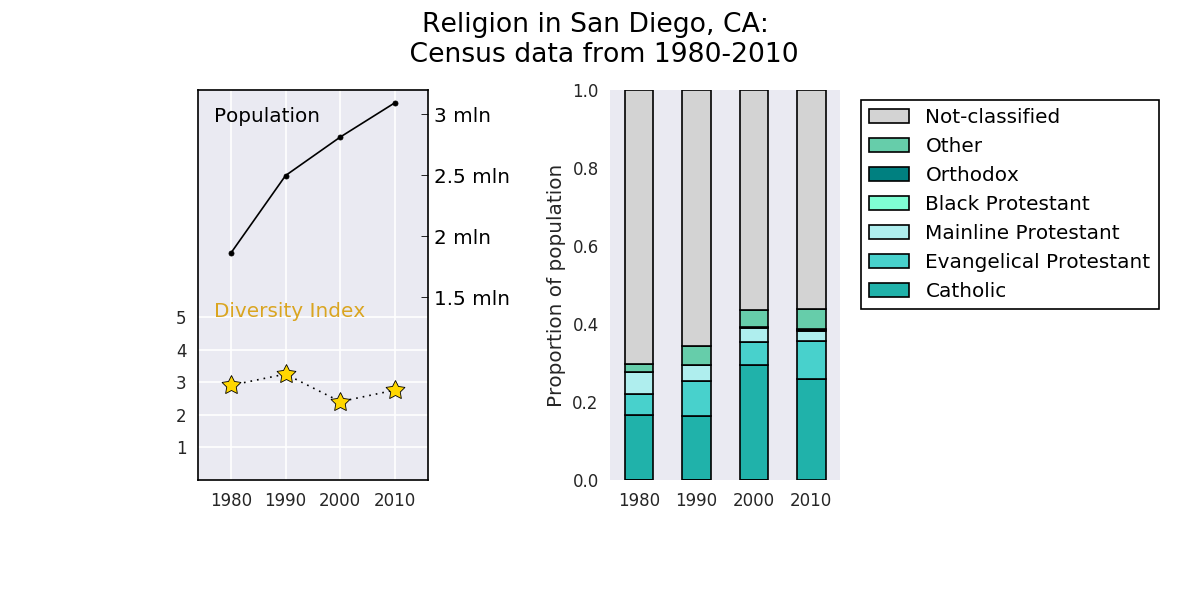

In [2]:
# Plotting
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib notebook

figure, (axis2,axis1) = plt.subplots(1, 2, figsize=(10,5))#,sharex=True)
plt.style.use('classic')

#subplot 1
def two_scales(ax1):
    ax2 = ax1.twinx()
    ax1.plot(popul['Diversity Index'], color="k",markerfacecolor="gold", marker=(5, 1),markersize=12, linestyle=':')
    ax1.set_ylim([0,12])
    ax1.set_yticks(np.arange(1,6,1))
    #ax1.set_ylabel('Religion Diversity Index')
    #ax1.yaxis.label.set_color("goldenrod")
    ax1.text(1977, 5, 'Diversity Index',
        color='goldenrod', fontsize=12)
    
    ax2.plot(popul['Population'], color='k',marker=".")
    #ax2.set_ylabel('Population')
    ax2.set_ylim([0,3200000])
    ax2.set_yticks([1500000,2000000,2500000,3000000])
    ax2.set_yticklabels(['1.5 mln','2 mln','2.5 mln','3 mln'])
    ax1.text(1977, 11, 'Population',
        color='k', fontsize=12)
    
    
    ax1.set_xticks(popul.index)
    ax2.set_xticklabels(['1980','1990','2000','2010'])
    ax1.set_xlim([1974,2016])
    #return ax1, ax2

#axes[0]
#plt.subplot(1, 2, 1)
#popul['Population'].plot.line(color="b",ax=axes[0], xticks=[1980,1990,2000,2010])
#popul['Diversity Index'].plot.line(color="gold", marker=(5, 1), ax=axes[0], xticks=[1980,1990,2000,2010])

#subplot 2
df2_norm.plot.bar(stacked=True, color=colors,ax=axis1, ylim=[0,1])
axis1.set_ylabel('Proportion of population',fontsize=12)
axis1.set_xlabel(' ',fontsize=12)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
handles, labels = axis1.get_legend_handles_labels()
axis1.legend(handles[::-1], labels[::-1], loc='upper left',bbox_to_anchor=(1.05, 1),prop={'size': 12})


figure.suptitle('Religion in San Diego, CA: \n Census data from 1980-2010', fontsize=16)
figure.tight_layout(pad=8.0)
figure.subplots_adjust(top=0.85)
figure.subplots_adjust(bottom=0.2)
figure.subplots_adjust(right=0.7)
#sns.violinplot('Year', 'Adherents', data=df.reset_index());

two_scales(axis2)

plt.savefig('Assignment4_Religion_SanDiego.pdf',facecolor='w', edgecolor='w',
        format='pdf')